<a href="https://colab.research.google.com/github/MohitGupta2021/ml/blob/main/_supportvector_machines_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

# This require internet 

def download_read_data(path):

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

In [29]:
cal_data=download_read_data( data_path)

In [30]:
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
len(cal_data)

20640

In [32]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(cal_data,test_size=0.2,random_state=20)


In [33]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,16512.0,-119.567038,1.999237,-124.3500,-121.7900,-118.49000,-118.01,-114.4900
latitude,16512.0,35.627891,2.133117,32.5500,33.9400,34.26000,37.71,41.9500
housing_median_age,16512.0,28.629482,12.610702,1.0000,18.0000,29.00000,37.00,52.0000
total_rooms,16512.0,2625.408794,2153.454223,6.0000,1450.0000,2127.00000,3148.00,39320.0000
total_bedrooms,16344.0,537.006914,417.933626,2.0000,296.0000,436.00000,646.00,6445.0000
population,16512.0,1421.184532,1104.984981,3.0000,785.0000,1166.00000,1722.00,28566.0000
households,16512.0,499.194949,380.218028,2.0000,279.0000,410.00000,605.00,6082.0000
median_income,16512.0,3.871777,1.899704,0.4999,2.5643,3.53255,4.75,15.0001
median_house_value,16512.0,206782.355378,114707.458670,14999.0000,120075.0000,180100.00000,264700.00,500001.0000


In [34]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [35]:
train_data['total_bedrooms'].value_counts()

284.0     42
280.0     42
309.0     41
317.0     41
272.0     39
          ..
1619.0     1
1086.0     1
1228.0     1
1272.0     1
1782.0     1
Name: total_bedrooms, Length: 1798, dtype: int64

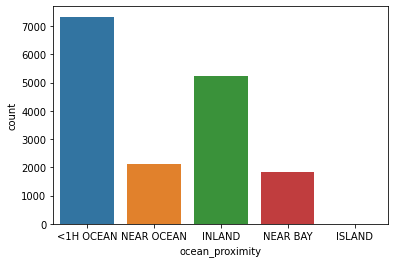

In [36]:
sns.countplot(data=train_data,x='ocean_proximity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c1dc55550>,
      dtype=object)

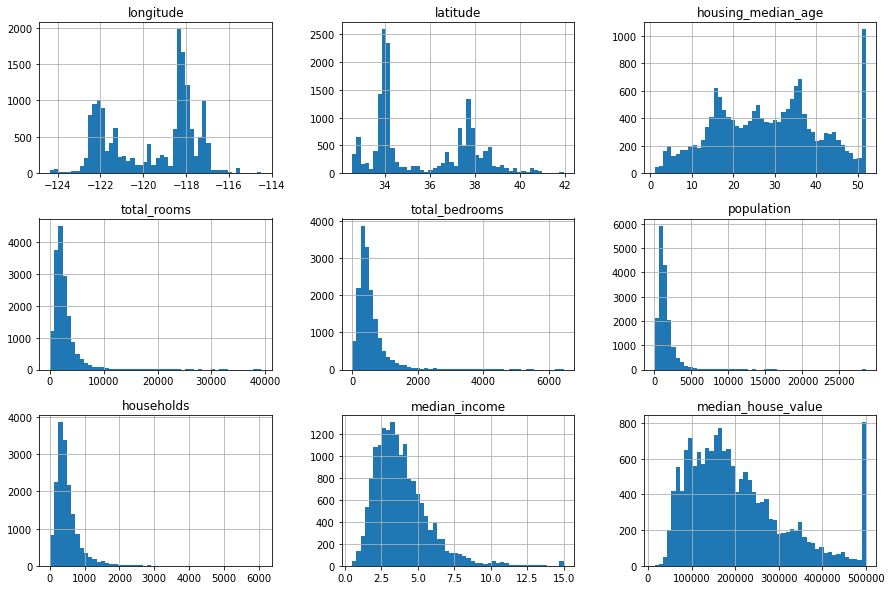

In [37]:
train_data.hist(bins=50,figsize=(15,10))

In [38]:
X_train=train_data.drop('median_house_value',axis=1)
Y_train=train_data['median_house_value']

In [39]:
#numerical features
num_feats=X_train.drop('ocean_proximity',axis=1)
#categorial features
cat_feats=X_train[['ocean_proximity']]

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipe=Pipeline([('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
num_prepared=num_pipe.fit_transform(num_feats)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_list=list(num_feats)
cat_list=list(cat_feats)

In [42]:
final_pipe=ColumnTransformer([('num',num_pipe,num_list),('cat',OneHotEncoder(),cat_list)])
X_train_processed=final_pipe.fit_transform(X_train)

In [43]:
from sklearn.svm import LinearSVR,SVR

In [44]:
lin_svr=LinearSVR()
lin_svr.fit(X_train_processed,Y_train)

LinearSVR()

In [45]:
poly_svr=SVR(kernel='poly')
poly_svr.fit(X_train_processed,Y_train)

SVR(kernel='poly')

In [46]:
from sklearn.metrics import mean_squared_error
prediction=lin_svr.predict(X_train_processed)
mse=mean_squared_error(Y_train,prediction)
rmse=np.sqrt(mse)
rmse


217619.2419963922

In [47]:
prediction=poly_svr.predict(X_train_processed)
mse=mean_squared_error(Y_train,prediction)
rmse=np.sqrt(mse)
rmse

117008.31538571569

In [48]:
from sklearn.model_selection import RandomizedSearchCV


params = {'gamma':[0.0001, 0.1],'C':[1,1000], 'epsilon':[0,0.5], 'degree':[2,5]}

rnd_search = RandomizedSearchCV(SVR(), params, n_iter=10, verbose=2, cv=3, random_state=42)

rnd_search.fit(X_train_processed,Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  13.5s
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  13.4s
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  13.4s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  13.5s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  13.5s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  13.5s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  13.5s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  13.5s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  13.5s
[CV] END ........C=1000, degree=5, epsilon=0.5, gamma=0.0001; total time=  13.4s
[CV] END ........C=1000, degree=5, epsilon=0.5, gamma=0.0001; total time=  13.5s
[CV] END ........C=1000, degree=5, epsilon=0.5, 

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [1, 1000], 'degree': [2, 5],
                                        'epsilon': [0, 0.5],
                                        'gamma': [0.0001, 0.1]},
                   random_state=42, verbose=2)